# 1. Data Import and Inspection



In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-failure-prediction


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Locate the file inside the downloaded folder
csv_path = os.path.join(path, "heart.csv")

# Load into pandas
df = pd.read_csv(csv_path)

In [4]:
# Look at first rows of the dataset
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
# Data overview & initial observations
print("Initial Observations:")
print(f"Dataset Size: {df.shape[0]} rows, {df.shape[1]} columns")
print("\nData Types and Missing Values:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

Initial Observations:
Dataset Size: 918 rows, 12 columns

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Summary Statistics:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000

# 2. Data Cleaning and Preparation

In [6]:
# Assume there are missing values in the dataset
# Handle missing values by replacing zeros with NaN
df['Cholesterol'] = df['Cholesterol'].replace(0, np.nan)
df['RestingBP'] = df['RestingBP'].replace(0, np.nan)
df['MaxHR'] = df['MaxHR'].replace(0, np.nan)

# Fill missing values with the median of the column
df['Cholesterol'] = df['Cholesterol'].fillna(df['Cholesterol'].median())
df['RestingBP'] = df['RestingBP'].fillna(df['RestingBP'].median())
df['MaxHR'] = df['MaxHR'].fillna(df['MaxHR'].median())

In [7]:
# Check for duplicates and drop them
df.drop_duplicates(inplace=True)

In [8]:
# Create age bins for better visualization of age-related prevalence
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [9]:
# Check dataset after cleaning and preparation
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroup
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0,40-49
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1,40-49
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0,30-39
3,48,F,ASY,138.0,214.0,0,Normal,108,Y,1.5,Flat,1,40-49
4,54,M,NAP,150.0,195.0,0,Normal,122,N,0.0,Up,0,50-59


# 3. Exploratory Data Analysis (EDA)

## 3.1. Medical Indicator Distributions by Heart Disease Status

### 3.1.1. Visualization

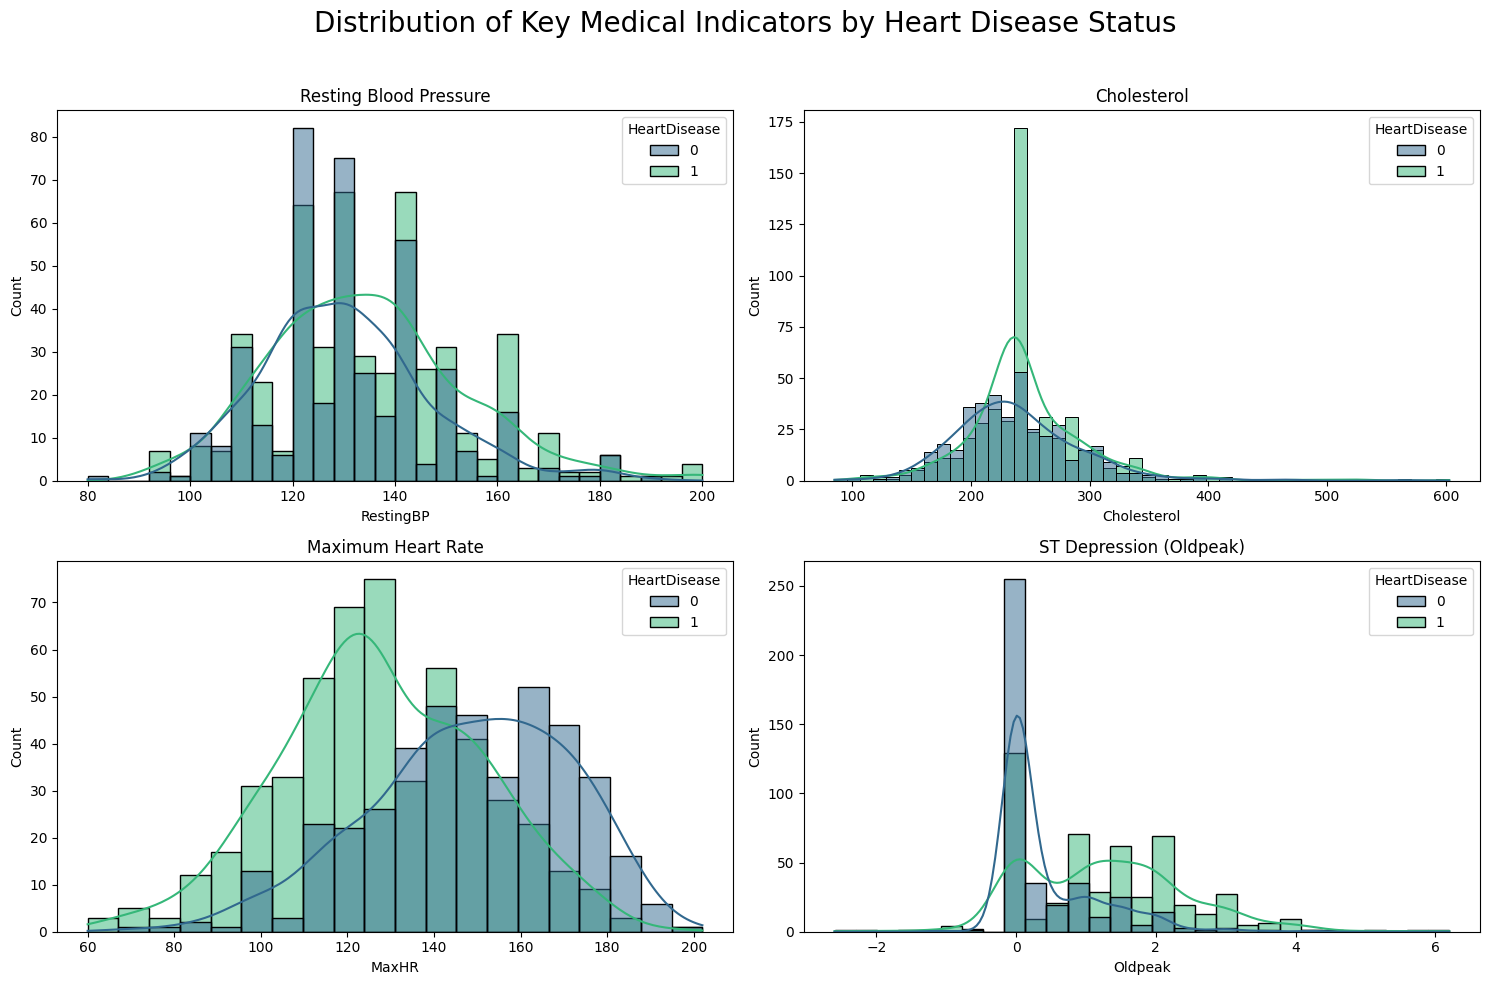

In [10]:
# Histograms of distribution of each key medical indicators
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Distribution of Key Medical Indicators by Heart Disease Status', fontsize=20)
sns.histplot(data=df, x='RestingBP', hue='HeartDisease', kde=True, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Resting Blood Pressure')
sns.histplot(data=df, x='Cholesterol', hue='HeartDisease', kde=True, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Cholesterol')
sns.histplot(data=df, x='MaxHR', hue='HeartDisease', kde=True, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Maximum Heart Rate')
sns.histplot(data=df, x='Oldpeak', hue='HeartDisease', kde=True, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('ST Depression (Oldpeak)')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('medical_indicators_histograms.png')
plt.show()

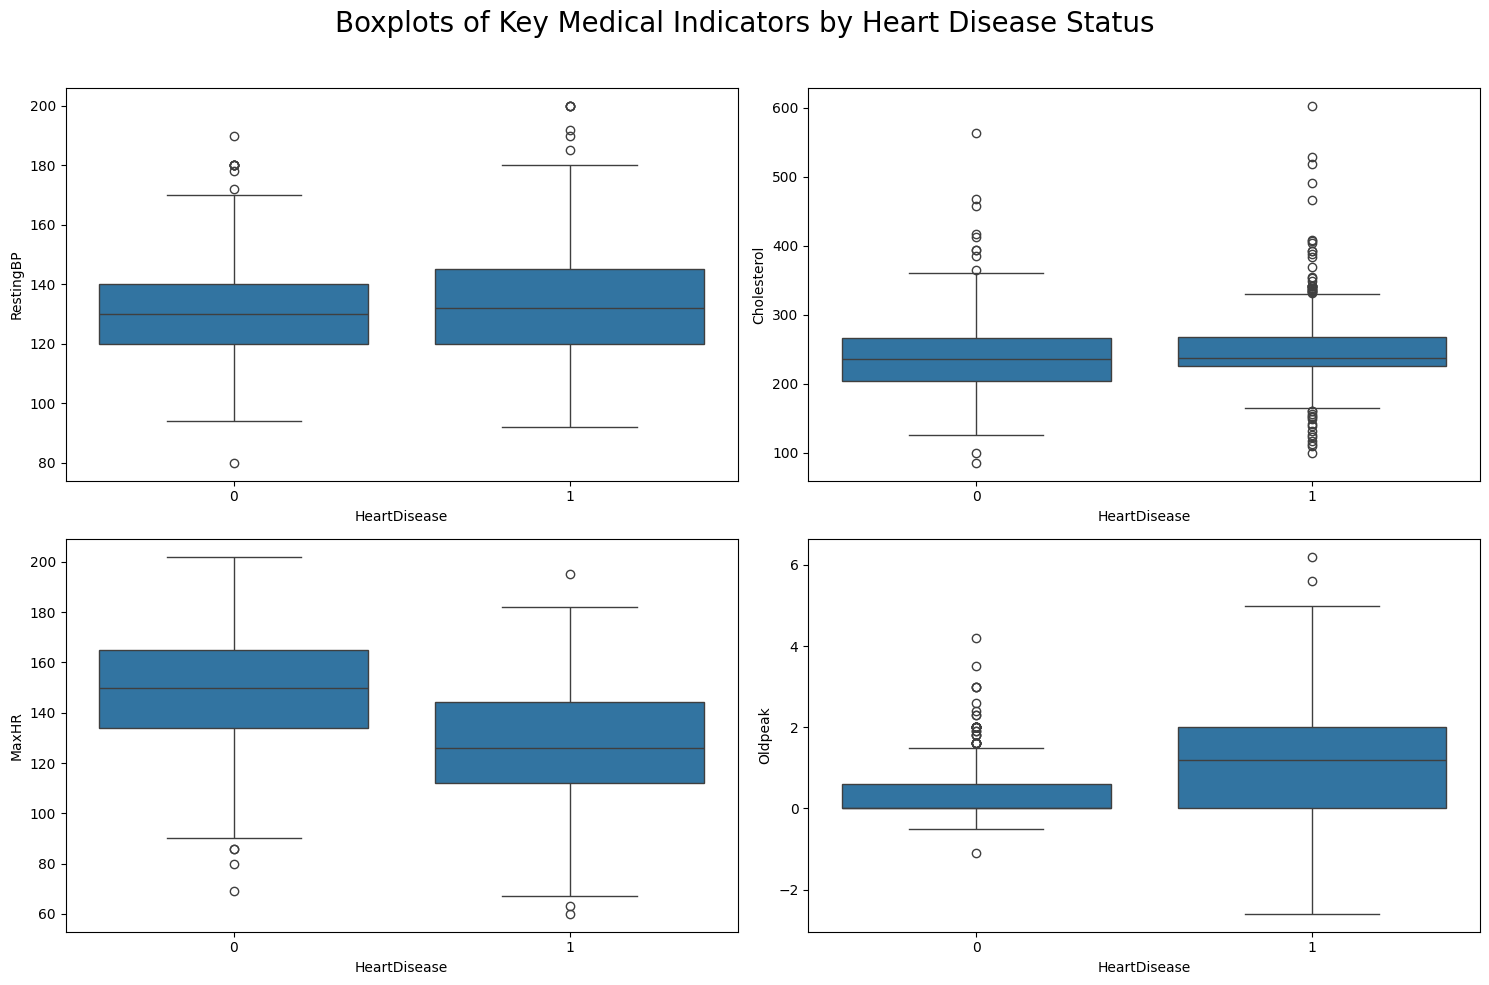

In [11]:
# Boxplots for comparison
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Boxplots of Key Medical Indicators by Heart Disease Status', fontsize=20)
sns.boxplot(x='HeartDisease', y='RestingBP', data=df, ax=axes[0, 0])
sns.boxplot(x='HeartDisease', y='Cholesterol', data=df, ax=axes[0, 1])
sns.boxplot(x='HeartDisease', y='MaxHR', data=df, ax=axes[1, 0])
sns.boxplot(x='HeartDisease', y='Oldpeak', data=df, ax=axes[1, 1])
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('medical_indicators_boxplots.png')
plt.show()

### 3.1.2. Insights

🩺🍔 **Resting Blood Pressure (RestingBP) & Cholesterol**

The distributions for both **RestingBP** and **Cholesterol** are very similar between the heart disease and no heart disease groups. The box plots show significant overlap.

For **RestingBP**:

* **No Heart Disease**: The median resting blood pressure is approximately 130 mm Hg. The interquartile range (IQR) is roughly from 120 to 140 mm Hg.

* **Heart Disease**: The median is also approximately 130 mm Hg, with a similar IQR.

For **Cholesterol**:

* **No Heart Disease**: The median cholesterol level is about 230 mg/dL, with a wide spread.

* **Heart Disease**: The median is also around 230 mg/dL, again with a wide spread.

The lack of a clear separation in these distributions confirms that these two indicators, on their own, are not strong predictors of heart disease in this dataset.

❤️ **Maximum Heart Rate Achieved (MaxHR)**

The **MaxHR** distributions show a clear difference, indicating it is a more useful indicator.

* **No Heart Disease**: The box plot is shifted to the right, showing a higher overall heart rate. The median **MaxHR** is around 150 beats per minute (bpm), with the IQR ranging from approximately 140 to 165 bpm. This group tends to have a higher maximum heart rate.

* **Heart Disease**: This group has a lower overall heart rate. The median **MaxHR** is closer to 130 bpm, with an IQR of roughly 120 to 145 bpm.

The difference in medians (150 bpm vs. 130 bpm) highlights MaxHR as a key differentiating factor.

📉 **ST Depression (Oldpeak)**

The box plots for **Oldpeak** show a very distinct separation between the two groups.

* **No Heart Disease**: The data is heavily concentrated at very low values. The median Oldpeak is 0.0, and the interquartile range is also very small, from 0.0 to 0.5. The presence of a horizontal line at 0.0 for the median clearly indicates that most people in this group have no significant ST depression.

* **Heart Disease**: The distribution is shifted to higher values. The median **Oldpeak** is approximately 1.5, with an IQR ranging from about 0.8 to 2.5. This indicates a much more pronounced ST depression, which is a key symptom of heart disease.

It suggests that this is another strong indicator.

## 3.2. Disease Prevalence by Demographic Factors

### 3.2.1. Visualization

/tmp/ipython-input-1333537284.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_prevalence = df.groupby('AgeGroup')['HeartDisease'].mean().reset_index()
/tmp/ipython-input-1333537284.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='HeartDisease', data=age_prevalence, palette='YlOrRd')


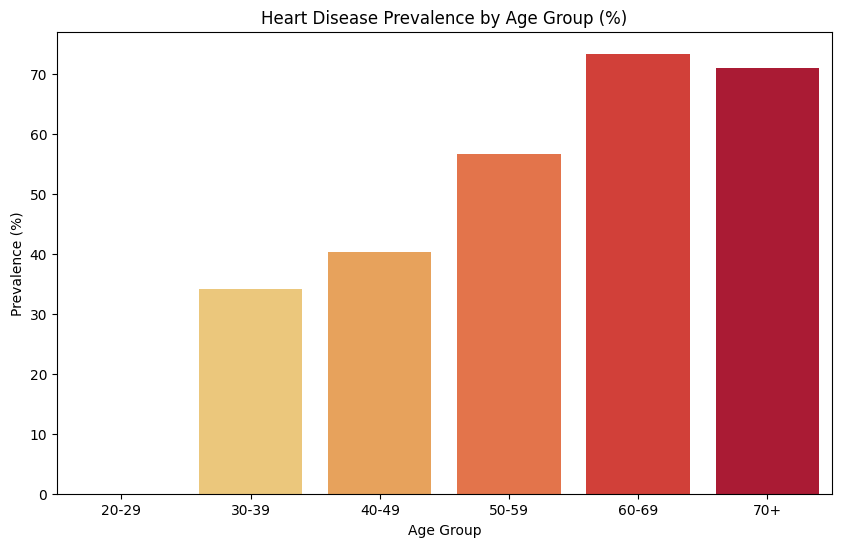

In [12]:
# Age Prevalence
age_prevalence = df.groupby('AgeGroup')['HeartDisease'].mean().reset_index()
age_prevalence['HeartDisease'] = age_prevalence['HeartDisease'] * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='HeartDisease', data=age_prevalence, palette='YlOrRd')
plt.title('Heart Disease Prevalence by Age Group (%)')
plt.xlabel('Age Group')
plt.ylabel('Prevalence (%)')
plt.savefig('age_prevalence_bar.png')
plt.show()

/tmp/ipython-input-3987803287.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='HeartDisease', data=sex_prevalence, palette='pastel')


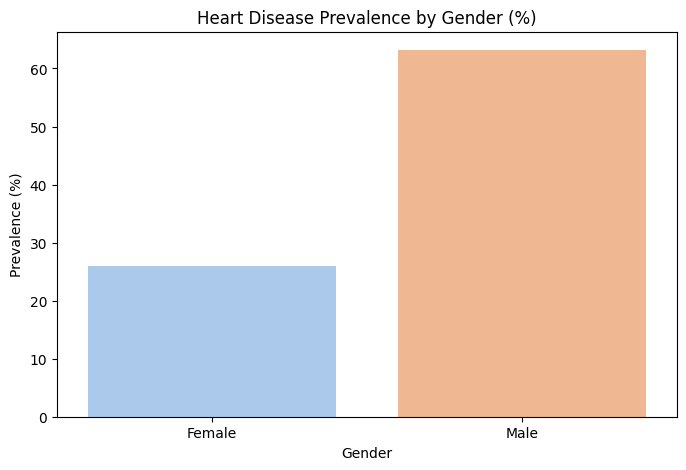

In [13]:
# Gender Prevalence
sex_prevalence = df.groupby('Sex')['HeartDisease'].mean().reset_index()
sex_prevalence['HeartDisease'] = sex_prevalence['HeartDisease'] * 100

plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='HeartDisease', data=sex_prevalence, palette='pastel')
plt.title('Heart Disease Prevalence by Gender (%)')
plt.xlabel('Gender')
plt.ylabel('Prevalence (%)')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.savefig('gender_prevalence_bar.png')
plt.show()

/tmp/ipython-input-1558075551.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_prevalence = df.groupby(['AgeGroup', 'Sex'])['HeartDisease'].mean().reset_index()


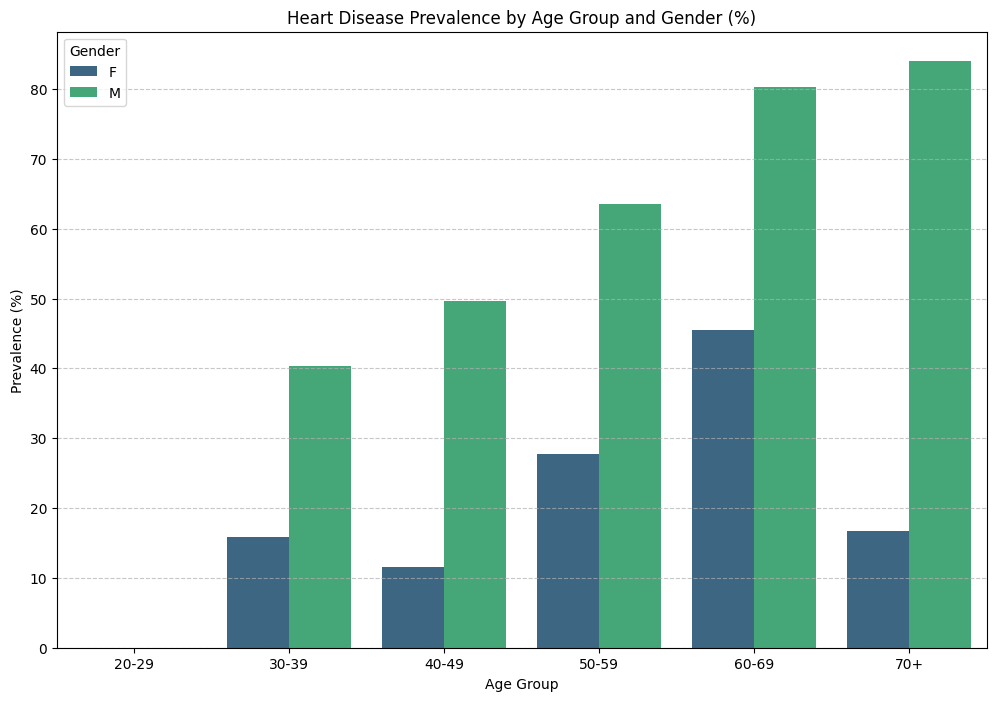

In [14]:
# Calculate heart disease prevalence by both age group and gender
grouped_prevalence = df.groupby(['AgeGroup', 'Sex'])['HeartDisease'].mean().reset_index()
grouped_prevalence['HeartDisease'] = grouped_prevalence['HeartDisease'] * 100

# Create the grouped bar chart
plt.figure(figsize=(12, 8))
sns.barplot(
    x='AgeGroup',
    y='HeartDisease',
    hue='Sex',  # This line creates the two columns (male and female)
    data=grouped_prevalence,
    palette='viridis'
)

plt.title('Heart Disease Prevalence by Age Group and Gender (%)')
plt.xlabel('Age Group')
plt.ylabel('Prevalence (%)')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('age_gender_prevalence_bar.png')
plt.show()

### 3.2.2. Insights

# Age

The most striking insight is the strong correlation between **age and heart disease prevalence**. As a person gets older, the likelihood of having heart disease increases dramatically.

* The age group **30-39** has the lowest percentage of heart disease, with a prevalence of approximately **35%**.

* The prevalence steadily increases with each subsequent decade.

* By the **50-59** age group, the prevalence of heart disease jumps to around **60%**.

* In the **60-69** and **70+** age group, the prevalence is even higher, above **70%**.

This trend shows a significant and consistent increase, making age one of the most important demographic predictors of heart disease in this dataset.

# Gender

It reveals a clear difference in heart disease prevalence between males and females

* Across all age groups, **males consistently have a higher prevalence of heart disease than females**.

* The difference is particularly noticeable in the younger age groups and the oldest age group. For example, in the 30-39 age group, the prevalence for males is about 40%, while for females it is almost 16%. In the 70+ age group, male prevalence is over 80%, while female prevalence is about 16%.

* The gap narrows slightly in the older age groups but remains significant. For example, in the 60-69 age group, the prevalence for males is 80%, while for females it is 46%.

These findings suggest that being male is a significant risk factor for heart disease.

## 3.3. The Role of Chest Pain and Exercise Angina

### 3.3.1. Visualization

/tmp/ipython-input-2008444913.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ChestPainType', y='HeartDisease', data=chestpain_prevalence, palette='coolwarm')


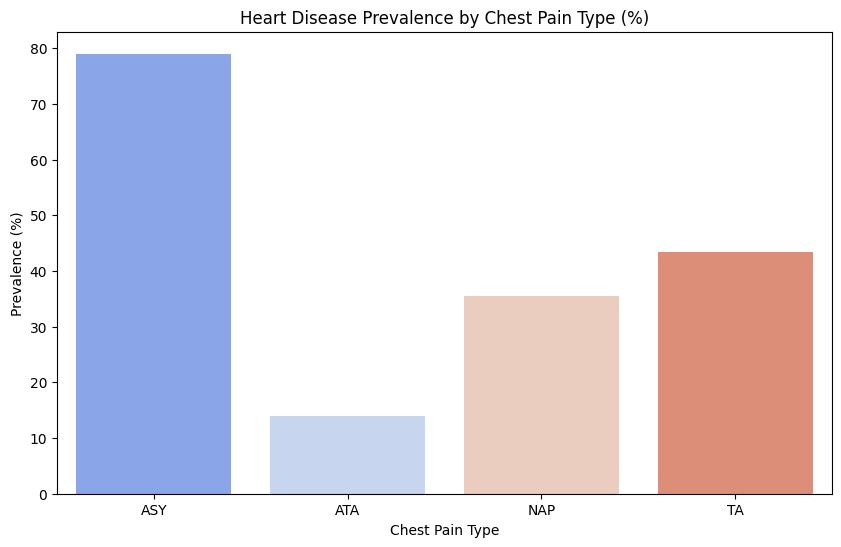

In [15]:
# Chest Pain Types Prevalence
chestpain_prevalence = df.groupby('ChestPainType')['HeartDisease'].mean().reset_index()
chestpain_prevalence['HeartDisease'] = chestpain_prevalence['HeartDisease'] * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='ChestPainType', y='HeartDisease', data=chestpain_prevalence, palette='coolwarm')
plt.title('Heart Disease Prevalence by Chest Pain Type (%)')
plt.xlabel('Chest Pain Type')
plt.ylabel('Prevalence (%)')
plt.savefig('chestpain_prevalence_bar.png')
plt.show()

/tmp/ipython-input-545366443.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ExerciseAngina', y='HeartDisease', data=angina_prevalence, palette='rocket')


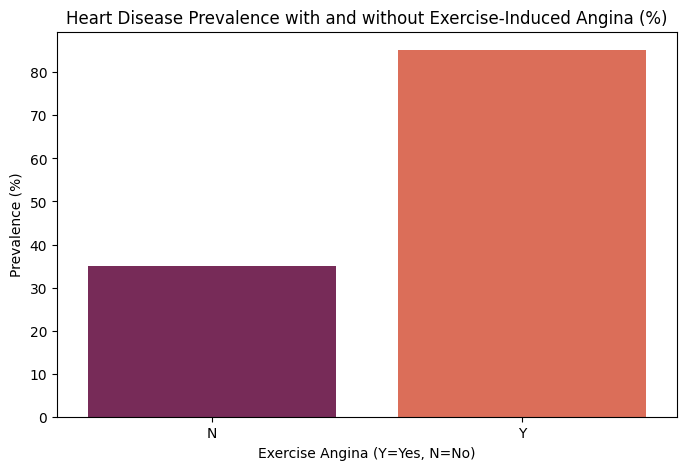

In [16]:
# Exercise-Induced Angina Prevalence
angina_prevalence = df.groupby('ExerciseAngina')['HeartDisease'].mean().reset_index()
angina_prevalence['HeartDisease'] = angina_prevalence['HeartDisease'] * 100

plt.figure(figsize=(8, 5))
sns.barplot(x='ExerciseAngina', y='HeartDisease', data=angina_prevalence, palette='rocket')
plt.title('Heart Disease Prevalence with and without Exercise-Induced Angina (%)')
plt.xlabel('Exercise Angina (Y=Yes, N=No)')
plt.ylabel('Prevalence (%)')
plt.savefig('angina_prevalence_bar.png')
plt.show()

### 3.3.2. Insights

# Chest Pain Type

The chart titled "Heart Disease Prevalence by Chest Pain Type (%)" shows a significant difference in heart disease prevalence across different types of chest pain.

* **Asymptomatic (ASY)**: This chest pain type is associated with the **highest prevalence of heart disease**, at nearly **80%**. This is a critical insight, as it indicates that many people with heart disease may not experience typical symptoms.

* **Atypical Angina (ATA)**: Individuals with this type of pain have the **lowest prevalence of heart disease**, at around **15%**.

* **Non-Anginal Pain (NAP)**: This type of pain is associated with a heart disease prevalence of approximately **35%**.

* **Typical Angina (TA)**: This type has a higher prevalence of heart disease, at around **45%**.

These findings suggest that the type of chest pain is a strong indicator of heart disease, with asymptomatic individuals having a surprisingly high prevalence.

# Exercise-Induced Angina

The chart titled "Heart Disease Prevalence with and without Exercise-Induced Angina (%)" highlights a clear and strong relationship between angina triggered by exercise and heart disease.

* **Yes (Y)**: Individuals who experience exercise-induced angina have a very high prevalence of heart disease, at nearly **85%**.

* **No (N)**: Individuals who do not experience exercise-induced angina have a significantly lower prevalence, at about **35%**.

This is one of the most powerful insights from the charts, indicating that exercise-induced angina is a highly predictive symptom of heart disease.

# 4. Correlation Analysis

## 4.1. Correlation matrix

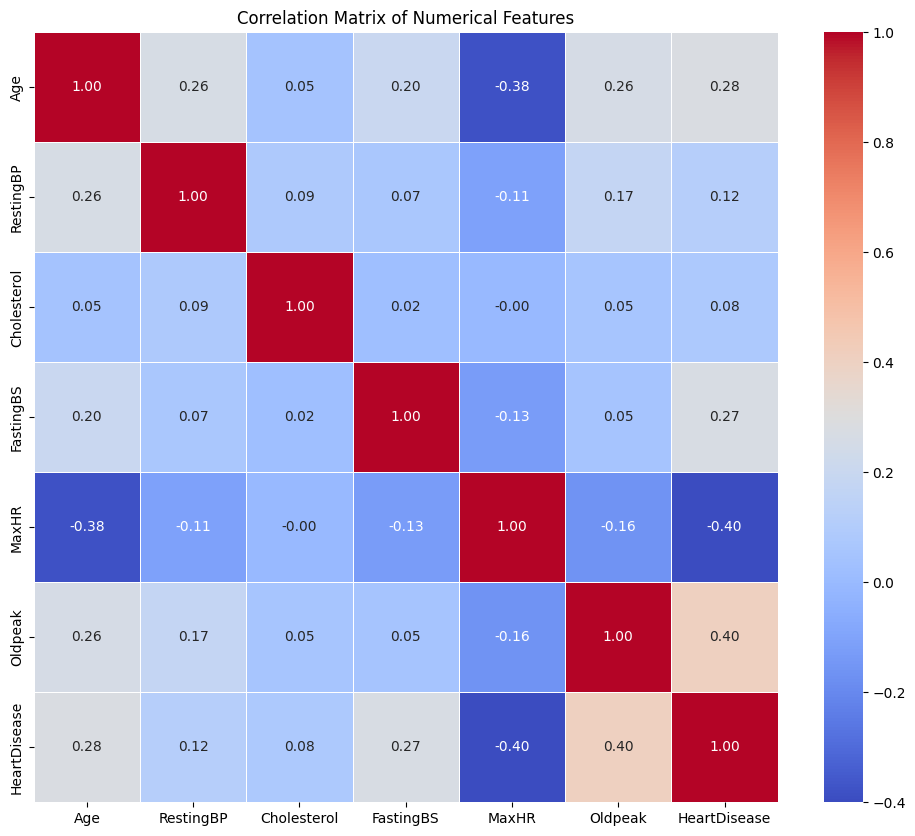

In [16]:
numerical_df = df.select_dtypes(include=np.number)
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('correlation_heatmap.png')
plt.show()

## 4.2. Insights

# Features Most Correlated with Heart Disease

* Oldpeak (0.40): There is a strong positive correlation between Oldpeak and HeartDisease. This means as Oldpeak (ST Depression) increases, the likelihood of heart disease also increases. This is a very strong predictor.

* MaxHR (-0.40): There is a strong negative correlation between MaxHR and HeartDisease. This means as MaxHR (Maximum Heart Rate) decreases, the likelihood of heart disease increases. This is another very strong predictor.

* Age (0.28): There is a moderate positive correlation between Age and HeartDisease. This confirms that as a person gets older, their risk of heart disease increases.

* FastingBS (0.27): There is a moderate positive correlation between FastingBS (Fasting Blood Sugar) and HeartDisease. This indicates that higher fasting blood sugar levels are associated with a higher risk of heart disease.

# Insights from Other Plots

The correlation matrix is a great starting point, but the other plots provide deeper, more visual insights that reinforce these correlations.

* The boxplots and histograms for Oldpeak and MaxHR clearly show the strong relationships identified in the correlation matrix. The distributions for those with heart disease are distinctly different from those without. For instance, the median Oldpeak for people with heart disease is about 1.5, while for those without, it's 0. Similarly, the median MaxHR for heart disease patients is around 125 bpm, significantly lower than the 150 bpm for healthy individuals.

* The "Heart Disease Prevalence by Age Group (%)" bar chart visually confirms the positive correlation between age and heart disease. The chart shows prevalence climbing from around 10% in the 30-39 age group to over 70% in the 70+ age group.

# Features with Weak or No Correlation

* RestingBP (0.12): The correlation between RestingBP and HeartDisease is very weak. The distribution plots also show a significant overlap, indicating that resting blood pressure is not a strong single predictor of heart disease in this dataset.

* Cholesterol (0.08): The correlation is also very weak, and the distributions in the plots are highly overlapping, suggesting cholesterol alone is not a strong predictor.

* FastingBS (0.27): While it has a positive correlation, it's not as strong as Oldpeak or MaxHR. This suggests that while it's a factor, it may be less predictive than the other two.

# 5. Hypotheses based on the insights

Based on the analysis, here are three main hypotheses that can be formed:

* **Heart disease risk increases significantly with age**, particularly after age 50. The data shows a strong positive correlation between age and heart disease prevalence.

* **Males are at a consistently higher risk of heart disease than females**, irrespective of age. This suggests that gender is an independent and significant risk factor.

* **Specific medical indicators, such as maximum heart rate (MaxHR) and ST depression (Oldpeak), are much more predictive of heart disease than traditional indicators like resting blood pressure or cholesterol**, which show a weak correlation with the condition.


# 6. Recommendations based on analysis results

The analysis results can be translated into several actionable recommendations for preventive healthcare strategies:

# A. Focus on High-Risk Groups
Preventive efforts should be primarily directed at the highest-risk demographic groups identified in the analysis. This includes **males** and **individuals over the age of 50**. These groups should be targeted for more frequent screenings, educational campaigns, and early intervention programs.

# B. Prioritize Key Diagnostic Indicators
When screening for heart disease, healthcare providers should place greater emphasis on **MaxHR** and **Oldpeak (ST Depression)**. The analysis shows these are the most strongly correlated and predictive medical indicators. While traditional metrics like blood pressure and cholesterol are important for general health, they should not be relied upon as the sole indicators for heart disease risk.

# C. Increase Awareness of Atypical Symptoms
The data revealed a very high prevalence of heart disease in individuals with **asymptomatic chest pain (ASY)**. This is a critical insight for public health messaging. Awareness campaigns should educate both the public and healthcare providers that heart disease can be present without the classic symptoms of chest pain. This could lead to earlier diagnosis and treatment for a significant portion of the high-risk population.

# D. Develop Targeted Preventive Strategies
For individuals with exercise-induced angina, the very high prevalence of heart disease (nearly 85%) makes it a clear red flag. Preventive care for this group should be swift and aggressive, possibly involving immediate testing and lifestyle changes.